## ESI 6213 Stochastic Decision Models
## Programming project Solved

##### Question 1. Estimate the expected reward in the St. Petersburg paradox.

Theoretically, the expected reward in the St. Petersburg paradox seems to be infinite. But, the utility function is not linear as assumed at first. Instead, when we use logarithmic utility function, the expected reward will be less than infinite.

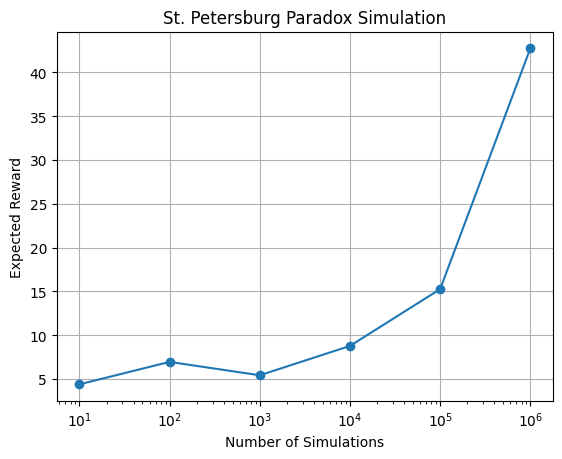

In [182]:
import random
import matplotlib.pyplot as plt


def st_petersburg_paradox_simulation(num_simulations):
    rewards = []
    for _ in range(num_simulations):
        count = 0
        while random.choice(['H', 'T']) == 'T':
            count += 1

        reward = 2 ** count if count > 0 else 0
        rewards.append(reward)
    expected_reward = sum(rewards)/len(rewards)
    return expected_reward


def plot_expected_rewards(simulation_counts):
    expected_rewards = []

    for count in simulation_counts:
        expected_rewards.append(st_petersburg_paradox_simulation(count))

    plt.plot(simulation_counts, expected_rewards, marker='o')
    plt.xscale('log')
    plt.xlabel('Number of Simulations')
    plt.ylabel('Expected Reward')
    plt.grid()
    plt.title('St. Petersburg Paradox Simulation')
    plt.show()

# Defining simulation counts
simulation_counts = [10, 100, 1000, 10000, 100000, 1000000]

# Plot expected rewards
plot_expected_rewards(simulation_counts)


##### Question 2. Let X, Y , Z be iid exp(λ). Estimate P(X < Y < Z) for a fixed λ.

P(X<Y<Z) = 0.166594


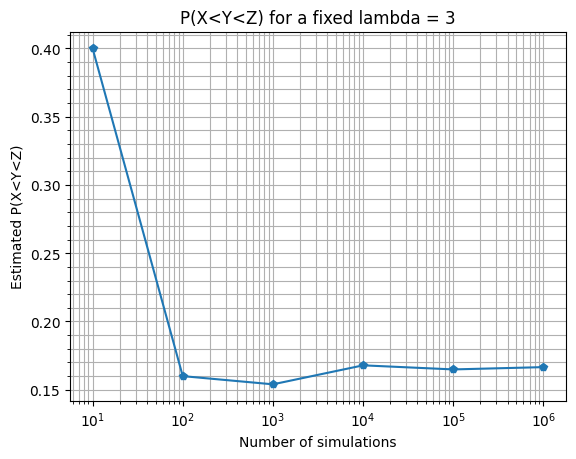

In [336]:
import numpy as np
import matplotlib.pyplot as plt


np.random.seed(20)
lambda_val = 3
M = [10, 100, 1000, 10000, 100000, 1000000]
P_XYZ = np.zeros(len(M))

for k in range(len(M)):
    count = 0
    for i in range(int(M[k])):
        r = np.random.exponential(lambda_val, 3)
        if r[0] < r[1] and r[1] < r[2]:
            count += 1
    P_XYZ[k] = count / M[k]
print(f"P(X<Y<Z) = {count / M[-1]}")

plt.plot(M, P_XYZ, '-p', linewidth=1.5)
plt.xscale('log')
plt.grid(True)
plt.grid('True', which='minor')
plt.grid('False', which='major')
plt.minorticks_on()
plt.xlabel('Number of simulations')
plt.ylabel('Estimated P(X<Y<Z)')
plt.title('P(X<Y<Z) for a fixed lambda = 3')
plt.show()


##### Question 3. Simulate a Poisson process with arrival rate λ by generating a sequence of underlying exponential interarrival times. Estimate P(N(t) = k), P(N(t) ≤ k), and E(N(t)). [λ = 3.1, t = 8.2, k = 21]


P(N(t) <= k) for 10 games is 0.2
P(N(t) == k) for 10 games is 0.1
The expected number of arrivals is 27.9

P(N(t) <= k) for 100 games is 0.17
P(N(t) == k) for 100 games is 0.07
The expected number of arrivals is 25.71

P(N(t) <= k) for 1000 games is 0.227
P(N(t) == k) for 1000 games is 0.062
The expected number of arrivals is 25.424

P(N(t) <= k) for 10000 games is 0.2169
P(N(t) == k) for 10000 games is 0.0551
The expected number of arrivals is 25.4848

P(N(t) <= k) for 100000 games is 0.22167
P(N(t) == k) for 100000 games is 0.05817
The expected number of arrivals is 25.41258

P(N(t) <= k) for 1000000 games is 0.222583
P(N(t) == k) for 1000000 games is 0.057596
The expected number of arrivals is 25.414083


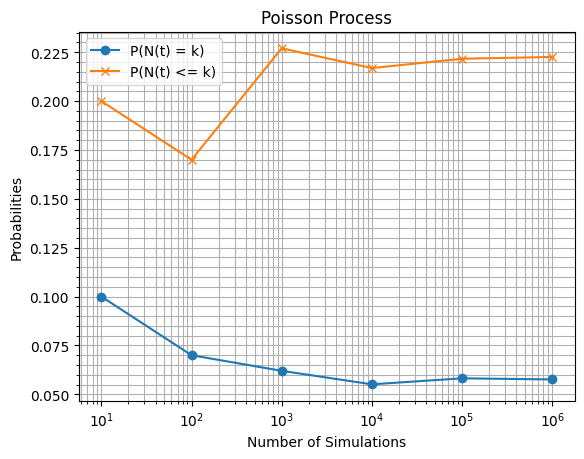

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[10, 100, 1000, 10000, 100000, 1000000] [27.9, 25.71, 25.424, 25.4848, 25.41258, 25.414083]


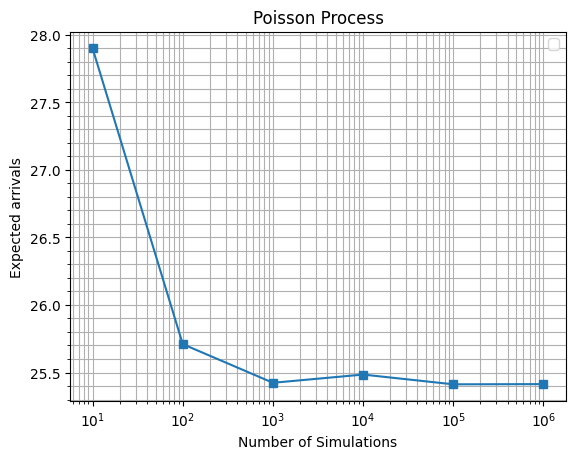

In [300]:
import random
t = 8.2
lamda = 3.1
k = 21

def generate_arrival_times(arrival_rate, simulation_time):
    arrival_times, time = [], 0
    while time < simulation_time:
        inter_arrival_time = random.expovariate(arrival_rate)
        time += inter_arrival_time
        if time < simulation_time:
            arrival_times.append(time)
    return arrival_times


simulation_counts = [10, 100, 1000, 10000, 100000, 1000000]
probEqual_array, probLess_array, avg_arrivals_array = [],[],[]
for count in simulation_counts:
    count_arrivals_array = []
    countTrue, countTrueEqual = 0, 0
    for i in range(count):
        elapsed_time = 0
        count_arrivals = 0
        times = generate_arrival_times(lamda, t)
        for elapsed_time in times:
            if elapsed_time <= 8.2:
                count_arrivals += 1
            else:
                break 
        count_arrivals_array.append(count_arrivals)
        
        if count_arrivals <= k:
            countTrue += 1
        if count_arrivals == k:
            countTrueEqual += 1
    # Answering P(N(t) <= k)
    probLess = countTrue / count
    print(f"\nP(N(t) <= k) for {count} games is {probLess}")

    # Answering P(N(t) = k)
    probEqual = countTrueEqual/count
    print(f"P(N(t) == k) for {count} games is {probEqual}")

    # Answering E[N(t)]
    avg_arrivals = sum(count_arrivals_array)/len(count_arrivals_array)
    print(f"The expected number of arrivals is {avg_arrivals}")

    probEqual_array.append(probEqual)
    probLess_array.append(probLess)
    avg_arrivals_array.append(avg_arrivals)

plt.plot(simulation_counts, probEqual_array, marker='o', label='P(N(t) = k)')
plt.plot(simulation_counts, probLess_array, marker='x', label='P(N(t) <= k)')

plt.xscale('log')
plt.xlabel('Number of Simulations')
plt.ylabel('Probabilities')
plt.grid('True', which='minor')
plt.grid('False', which='major')
plt.minorticks_on()
plt.title('Poisson Process')
plt.legend()
plt.show()

plt.xscale('log')
plt.xlabel('Number of Simulations')
plt.ylabel('Expected arrivals')
plt.grid('True', which='minor')
plt.grid('False', which='major')
plt.minorticks_on()
plt.title('Poisson Process')
plt.legend()
print(simulation_counts, avg_arrivals_array)
plt.plot(simulation_counts, avg_arrivals_array, marker='s', label='Expected arrivals')
plt.show()

##### Question 4. Simulate a split Poisson process with arrival rate λ, where each arrival is classified as type 1 with probability p or type 2, otherwise. Estimate E(N1(t)) and E(N2(t)). [λ = 3.1, p = 0.78, t = 8.2]

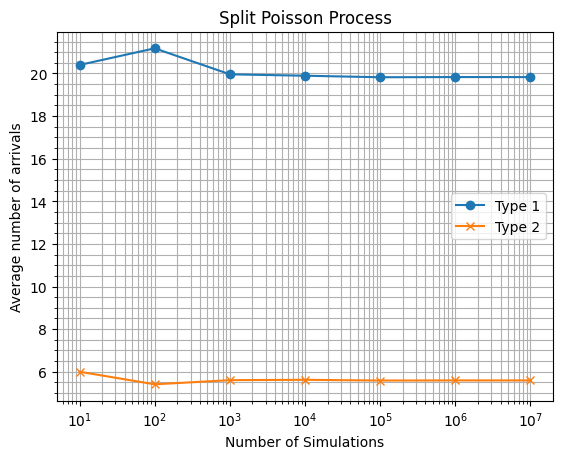

In [39]:
import random
import matplotlib.pyplot as plt

def generate_arrival_times(arrival_rate, simulation_time):
    arrival_times, time = [], 0
    while time < simulation_time:
        inter_arrival_time = random.expovariate(arrival_rate)
        time += inter_arrival_time
        if time < simulation_time:
            arrival_times.append(time)
    return arrival_times

def simulate_arrival_process(arrival_times, type1_probability):
    return [{'time': time, 'type': 1 if random.uniform(0, 1) < type1_probability else 2} for time in arrival_times]

def simulate(count, avg_t1a, avg_t2a):
    simulation_time, arrival_rate, type1_probability = 8.2, 3.1, 0.78
    total_simulations, total_type1_arrivals, total_type2_arrivals, total_arrivals = count, 0, 0, 0

    for _ in range(total_simulations):
        arrivals = simulate_arrival_process(generate_arrival_times(arrival_rate, simulation_time), type1_probability)

        total_type1_arrivals += sum(1 for arrival in arrivals if arrival['type'] == 1)
        total_type2_arrivals += sum(1 for arrival in arrivals if arrival['type'] == 2)
        total_arrivals += len(arrivals)

    avg_t1a.append(total_type1_arrivals / total_simulations)
    avg_t2a.append(total_type2_arrivals / total_simulations)
    return avg_t1a, avg_t2a

def main():
    avg_type1_arrival, avg_type2_arrival = [], []

    # Simulation counts
    simulation_counts = [10, 100, 1000, 10000, 100000, 1000000, 10000000]
    
    for count in simulation_counts:
        avg_type1_arrival, avg_type2_arrival = simulate(count, avg_type1_arrival, avg_type2_arrival)

    plt.plot(simulation_counts, avg_type1_arrival, marker='o', label='Type 1')
    plt.plot(simulation_counts, avg_type2_arrival, marker='x', label='Type 2')
    
    plt.xscale('log')
    plt.xlabel('Number of Simulations')
    plt.ylabel('Average number of arrivals')
    plt.grid('True', which='minor')
    plt.grid('False', which='major')
    plt.minorticks_on()
    plt.title('Split Poisson Process')
    plt.legend()
    plt.show()

if __name__ == "__main__":
    main()


##### Question 5. Simulate a compound Poisson process with arrival rate λ, where the number of entities in each arriving batch is distributed uni(1, b). Estimate E(N(t)). [λ = 3.1, b = 3, t = 8.2]

E[N(t)] = 50.84874229378045


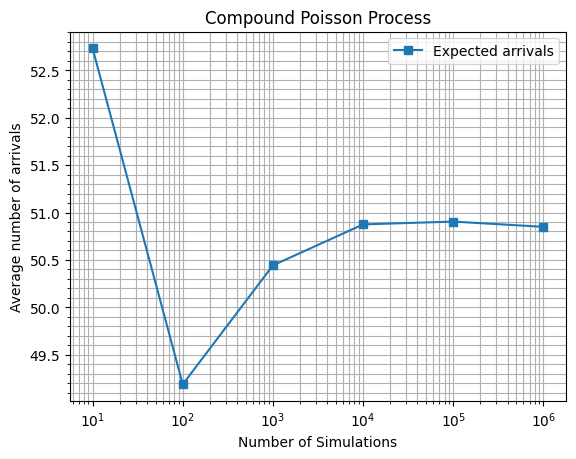

In [7]:
import random
import matplotlib.pyplot as plt

t = 8.2
lamda = 3.1
b = 3
simulation_counts = [10, 100, 1000, 10000, 100000, 1000000]
probEqual_array, probLess_array, avg_arrivals_array = [],[],[]

def generate_arrival_times(arrival_rate, simulation_time):
    arrival_times, time = [], 0
    while time < simulation_time:
        inter_arrival_time = random.expovariate(arrival_rate)
        time += inter_arrival_time
        if time < simulation_time:
            arrival_times.append(time)
    return arrival_times


for count in simulation_counts:
    count_arrivals_array = []
    countTrue, countTrueEqual = 0, 0

    for _ in range(count):
        times = generate_arrival_times(lamda, t)
        count_arrivals = sum(random.uniform(1,b) for elapsed_time in times if elapsed_time <= t)
        count_arrivals_array.append(count_arrivals)


    avg_arrivals = sum(count_arrivals_array) / count
    avg_arrivals_array.append(avg_arrivals)

print(f"E[N(t)] = {avg_arrivals_array[-1]}")
plt.plot(simulation_counts, avg_arrivals_array, marker='s', label='Expected arrivals')
plt.xscale('log')
plt.xlabel('Number of Simulations')
plt.ylabel('Average number of arrivals')
plt.grid('True', which='minor')
plt.grid('False', which='major')
plt.minorticks_on()
plt.title('Compound Poisson Process')
plt.legend()
plt.show()


##### Question 6. Entities arrive to a single server as a Poisson process with rate λ. When an entity arrives, if the server is vacant, the entity proceeds to the server; otherwise, it joins the queue. The queue capacity is unlimited. Service times are iid exp(µ). Arrivals and service completions are independent. When an entity completes the service, it leaves the system. Simulate the queueing process for 10,000 arrivals and estimate [λ = 17.1, µ = 21.4]:
##### · the average waiting time in the queue per entity
##### · the average time through the system per entity
##### · the server utilization, i.e., the fraction of time the server is busy
##### · the fraction of entities which do not have to wait in the queue

In [4]:
import numpy as np
import statistics

lmbda = 17.1
u = 21.4
arrival_time = 0
queue = 0 
wait_time_chain = []
time_in_system_chain = []
busy_time = 0
total_entities = 0
no_wait_entities = 0

np.random.seed(20)

for arrival in range(0, 10000):
    total_entities += 1
    entity = np.random.exponential(1 / lmbda)
    arrival_time += entity 
    server_time = np.random.exponential(1 / u)
    busy_time += server_time

    # if there is no queue
    if queue < arrival_time:  
        no_wait_entities += 1
        queue = arrival_time + server_time  
        wait_time_chain.append(0)
        time_in_system_chain.append(server_time)
    else:
    # the entity waits until the queue is freed
        wait_time = queue - arrival_time  
        wait_time_chain.append(wait_time)
        queue += server_time 
        time_in_system_chain.append(wait_time + server_time) 

average_wait_time = statistics.mean(wait_time_chain)
print('The average wait time per entity is: ', np.round(average_wait_time, 4))
average_total_time = statistics.mean(time_in_system_chain)
print('The average time in the system per entity is: ', np.round(average_total_time, 4))
server_utilization = busy_time / queue
print('The server utilization is: ', np.round(server_utilization, 4))
fraction_no_wait = no_wait_entities / total_entities
print('The fraction of entities which do not have to wait is: ', np.round(fraction_no_wait, 4))


The average wait time per entity is:  0.1684
The average time in the system per entity is:  0.2157
The server utilization is:  0.8024
The fraction of entities which do not have to wait is:  0.2012


##### Question 7. A roulette wheel has 18 red, 18 black, and one zero slots. With each play of the game, a gambler bets b > 0 on red. Initially, gambler’s capital, C = 10. A game is over when he attains capital C = c > 0 or becomes broke (C = 0). Simulate this Markov chain for 10,000 plays and estimate the probability of becoming broke. 
##### Evaluate these scenarios: 1. b = 1, c = 20; 2. b = 1, c = 40; 3. b = 2, c = 20

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Scenario  Simulations  Probabilitites
(1, 20)          10        0.7000
(1, 20)          100        0.6727
(1, 20)          1000        0.6135
(1, 20)          10000        0.6330
(1, 20)          100000        0.6322
(1, 20)          1000000        0.6319
(1, 40)          10        1.0000
(1, 40)          100        0.9455
(1, 40)          1000        0.9090
(1, 40)          10000        0.9060
(1, 40)          100000        0.9052
(1, 40)          1000000        0.9065
(2, 20)          10        0.4000
(2, 20)          100        0.5000
(2, 20)          1000        0.5324
(2, 20)          10000        0.5635
(2, 20)          100000        0.5690
(2, 20)          1000000        0.5674


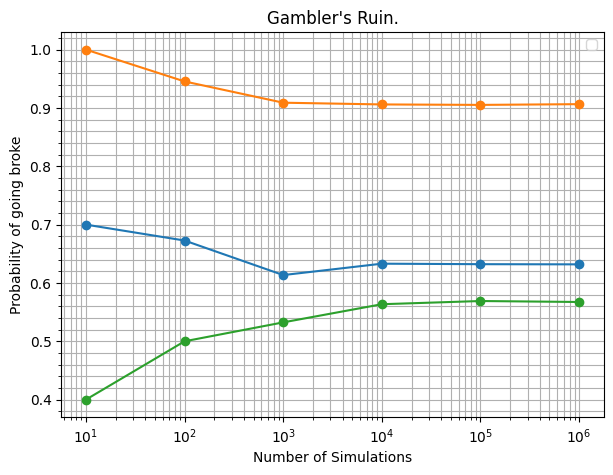

In [11]:
# Simulation

import numpy as np
import matplotlib.pyplot as plt


simulation_counts = [10, 100, 1000, 10000, 100000, 1000000]
C = 10

# list of lists of scenarios => [b, c]'s
scenarios = [(1, 20), (1, 40), (2, 20)]

# defining probabilities
p_red = float(18/37)
p_black = float(18/37)
p_zero = float(1/37)

def integer_walk(scenario):
    money_per_game, winning_sum = scenario[0], scenario[1]

    amt_collected = C
    while amt_collected:
        gameplay = np.random.random()
        if gameplay <= p_red:
            amt_collected += money_per_game
            if winning_sum == amt_collected:
                return True
        else:
            amt_collected -= money_per_game
            if amt_collected <= 0 or winning_sum == 0:
                return False



prob = {}
plt.figure(figsize=(7, 5))
plt.xscale('log')
plt.xlabel('Number of Simulations')
plt.ylabel('Probability of going broke')
plt.grid()
plt.title('Gambler\'s Ruin.')
plt.grid('True', which='minor')
plt.grid('False', which='major')
plt.legend()
plt.minorticks_on()
print("Scenario  Simulations  Probabilitites")
for k, scenario in enumerate(scenarios):
    probabilities = []
    countW = 0
    countB = 0
    for count in simulation_counts:
        broke_count = 0
        for i in range(count):
            if integer_walk(scenario):
                countW+=1 
            else:
                countB+=1
        probabilities.append(countB/(countW + countB))
    
        print(f"{scenario}          {count}        {probabilities[-1]:.4f}")
    prob[k] = probabilities


    plt.plot(simulation_counts, probabilities, marker='o', label = f"scenario{k}")
plt.show()

##### Question 8. A machine is inspected daily and its condition is classified into one of the following states: 1 - operational, 2 - minor issues, 3 - major issues, 4 - failed (in-repair). The daily one-step transition probability matrix and daily profit vector are given below. Assume the machine starts in state 1. Simulate the evolution of the machine’s condition for 10,000 days and estimate the long-run expected average profit (LREAP) per day.

In [113]:
# Analytical Solution

import numpy as np
import random


simulation_count = 10000
# Defining the states
states = (1, 2, 3, 4)

# Defining the profit
profit_values = np.array([9000, 7000, 4000, -2000])
profit = 0

np.random.seed(10)

# Defining the transition probabilities
P = np.array([
    [0.88, 0.07, 0.03, 0.02],
    [0, 0.90, 0.06, 0.04],
    [0, 0, 0.85, 0.15],
    [1, 0, 0, 0]]).T

A = P[[0, 1, 2],]
one = [1, 1 ,1 ,1]
A = np.vstack((A, one))
I = np.identity(4)

A = np.subtract(A, I)
A[-1][-1] = 1
b = np.array([0, 0, 0, 1])
x = np.linalg.solve(A, b)
profit = np.matmul(profit_values, x.T)
print(f"The LREAP per day would be {profit}.")


The LREAP per day would be 6773.91304347826.


In [112]:
import numpy as np
import random


simulation_count = 10000
# Defining the states
states = (1, 2, 3, 4)

# Defining the profit
profit_values = (9000, 7000, 4000, -2000)
profit = 0

np.random.seed(10)

# Defining the transition probabilities
P = np.array([
    [0.88, 0.07, 0.03, 0.02],
    [0, 0.90, 0.06, 0.04],
    [0, 0, 0.85, 0.15],
    [1, 0, 0, 0]])

state_travelled = [1]
for i in range(simulation_count - 1):
    last_state = state_travelled[-1]
    prob = P[last_state - 1,:]
    choice = np.random.choice(states, p = prob)
    profit += profit_values[choice - 1]
    state_travelled.append(choice)
profit /= simulation_count
print(f"The LREAP per day is $ {profit}.")


The LREAP per day is $ 6782.0.


##### Question 9. An alternative policy is to repair the machine when it is in state 3 at a cost of $500, which will bring the machine to state 1 at the beginning of the next day. Compare LREAP of the new policy to that from # 9.

In [115]:
# Analytical Solution

import numpy as np
import random

np.random.seed(10)
simulation_count = 10000
# Defining the states
states = (1, 2, 3, 4)

# Defining the profit
profit_values = np.array([9000, 7000, -500, -2000])
profit = 0

# Defining the transition probabilities
P = np.array([
    [0.88, 0.07, 0.03, 0.02],
    [0, 0.90, 0.06, 0.04],
    [1, 0, 0, 0],
    [1, 0, 0, 0]]).T

A = P[[0, 1, 2],]
one = [1, 1 ,1 ,1]
A = np.vstack((A, one))
I = np.identity(4)

A = np.subtract(A, I)
A[-1][-1] = 1
b = np.array([0, 0, 0, 1])
x = np.linalg.solve(A, b)
profit = np.matmul(profit_values, x.T)
print(f"The LREAP per day would be {profit}.")


The LREAP per day would be 7564.835164835165.


In [43]:
import numpy as np
import random


simulation_count = 10000
# Defining the states
states = (1, 2, 3, 4)

# Defining the profit
profit_values = (9000, 7000, -500, -2000)
profit = 0

np.random.seed(10)

# Defining the transition probabilities
P = np.array([
    [0.88, 0.07, 0.03, 0.02],
    [0, 0.90, 0.06, 0.04],
    [1, 0, 0, 0],
    [1, 0, 0, 0]])

state_travelled = [1]
for i in range(simulation_count - 1):
    last_state = state_travelled[-1]
    prob = P[last_state - 1,:]
    choice = np.random.choice(states, p = prob)
    profit += profit_values[choice - 1]
    state_travelled.append(choice)
profit /= simulation_count
print(f"The LREAP expected profit is $ {profit}.")

The LREAP expected profit is $ 7595.55.


##### Question 10. A BDP system has n entities, each reproducing and deceasing at rates λ and µ, respectively, independently of the others. Estimate the expected time to double the population size. [n = 4, λ0 = λ = 4.2, µ = 3.7].

In [18]:
# Analytical Solution

lamda_val = 4.2
mu = 3.7
initial_population = 4
final_population = 8

T = []
T.append(1/lamda_val)
# The time to for the next increment or decrement is given by T(i+1) = (1/lamda_val) + (mu/lamda_val) * T(i)
for i in range(final_population):
    if i != 0:
        T.append((1/(lamda_val*i)) + ((mu/lamda_val) * T[i-1]))

time = 0
for j in range(initial_population, final_population):
    time += T[j]

print(f"The expected time for population being {final_population} starting from {initial_population} is {time}.")

The expected time for population being 8 starting from 4 is 1.9991353153044122.


The expected time to double the population starting from 4 is 1.9946290632642336
[0, 0.03310817089120261, 0.2324318551912725, 0.25377346478558865, 0.4665163084974641, 0.5253482446038339, 0.9973549002759357, 1.0701942623296505, 1.2151298969070152, 1.3221321735330835, 1.3599692555077, 1.3641694089588687, 1.437374851876091, 1.49903855831801, 1.7199858114180728]
[4 3 2 3 4 3 2 3 4 3 4 5 6 7 8]


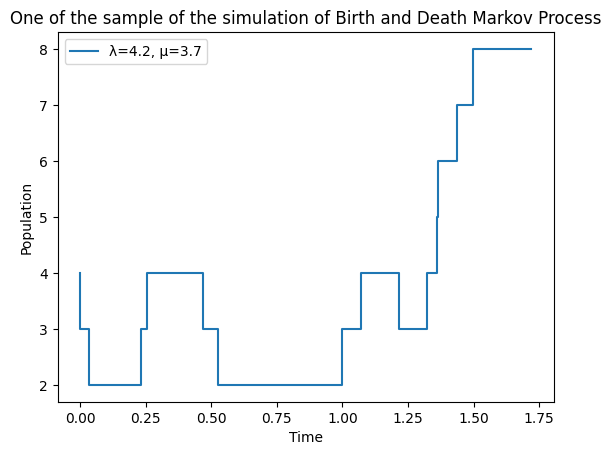

In [26]:
# Simulation
num_steps = 20
lambda_val = 4.2
mu_val = 3.7
initial_population = 4

import numpy as np
import matplotlib.pyplot as plt

def birth_death_markov_process(num_steps, lambda_val, mu_val, initial_population):
    population = [initial_population]
    arrival_times = [0]
    arrival_time = 0
    for _ in range(num_steps+1):
        current_population = population[-1]
        total = lambda_val + mu_val
        birth_prob = lambda_val / total
        death_prob = mu_val / total
        interarrival_time = np.random.exponential(scale=1/total)
        arrival_time += interarrival_time
        arrival_times.append(arrival_time)


        if np.random.rand() < birth_prob:
            current_population += 1
        elif current_population != 0:
                current_population -= 1
        population.append(current_population) 
        if current_population == 2 * initial_population:
            break
        
    return np.array(population), arrival_times

last_arrival_times = []
for i in range(10000):
    population_trajectory, arrival_times = birth_death_markov_process(num_steps, lambda_val, mu_val, initial_population)
    last_arrival_times.append(arrival_times[-1])

    
print(f"The expected time to double the population starting from {initial_population} is {sum(last_arrival_times)/len(last_arrival_times)}")
print(arrival_times)
print(population_trajectory)
plt.step(arrival_times, population_trajectory, label=f'λ={lambda_val}, μ={mu_val}')
plt.xlabel('Time')
plt.ylabel('Population')
plt.title('One of the sample of the simulation of Birth and Death Markov Process')
plt.legend()
plt.show()

##### Question 11. A machine works for an exp(λ) time before breaking down, followed by an exp(µ) repair time. After a repair, the machine is again operational. If the machine is operational at time 0, estimate the probability that it will be operational at time t. [λ = 2.1, µ = 0.12, t = 10, 000]

Progress: 100%|██████████| 10000/10000 [02:30<00:00, 66.39it/s]


The the probability of the machine being operational after 10000 time is 0.0563.


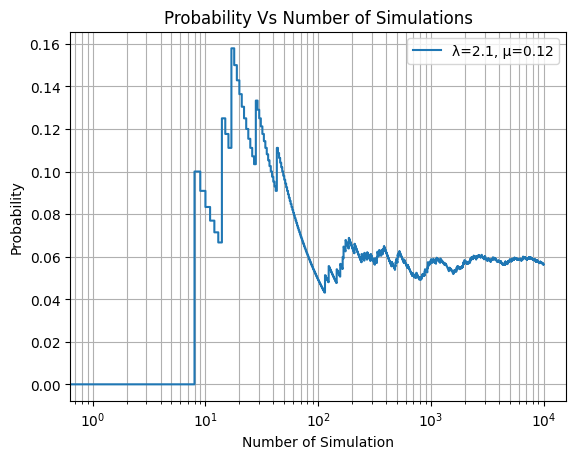

In [48]:
t = 10000
del_t = 2
lambda_val = 2.1
mu_val = 0.12
initial_state = 0
states = (0,1)
from IPython.display import clear_output
import numpy as np
import matplotlib.pyplot as plt
random.seed(20)
def birth_death_markov_process(t, lambda_val, mu_val, initial_state):
    states = [initial_state]
    arrival_times = [0]
    arrival_time = 0
    time = 0
    while time <= t:
        current_state = states[-1]
        total = lambda_val + mu_val
        p_operational = lambda_val / total
        p_failure = mu_val / total
        interarrival_time = np.random.exponential(scale=1/total)
        arrival_time += interarrival_time
        arrival_times.append(arrival_time)

        if np.random.rand() > p_operational:
            state_passed = 0
        else:
                state_passed = 1
        states.append(state_passed)
        time += interarrival_time

    return states

probabilities = []
last_states = []

import tqdm
with tqdm.tqdm(range(10000),'Progress') as bar:
    for i in range(10000):
        states = birth_death_markov_process(t, lambda_val, mu_val, initial_state)
        last_states.append(states[-1])
        c = last_states.count(0)
        # clear_output(wait = True)
        # print(c)
        # print(len(last_states))
        p = c/len(last_states)
        probabilities.append(p)
        bar.update(1)

    
print(f"The the probability of the machine being operational after 10000 time is {p}.")

plt.step(range(10000), probabilities, label=f'λ={lambda_val}, μ={mu_val}')
plt.xlabel('Number of Simulation')
plt.ylabel('Probability')
plt.title('Probability Vs Number of Simulations')
plt.xscale('log')
plt.grid('True', which='minor')
plt.grid('False', which='major')
plt.legend()
plt.show()